## Created By
### Alakesh Bora
### Email ID: alokesh985@gmail.com

## **Connecting to Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## **1. Importing dataset and libraries. Exploring the dataset.**

In [133]:
import pandas as pd
import numpy as np
from warnings import filterwarnings

dataset = pd.read_csv("/content/gdrive/My Drive/Temp/Internship Studio project/data.csv")
filterwarnings("ignore")

# Shape of dataset
shape = dataset.shape
print(f"Rows in Dataset: {shape[0]}")
print(f"Columns in Dataset: {shape[1]}\n")

columns = list(dataset.columns)

# Columns in dataset
print("Columns in dataset: \n")
for column in columns: print(column)

# NULL values in each column
print("\nNumber of NULL items in each column: ")
null_columns = dataset.columns[dataset.isnull().any()]
print(dataset[null_columns].isnull().sum())

# Statistical Summary
print(f"\nStats about the dataset: \n{dataset.describe()}\n")

# First 5 rows
print(f"\nFirst 5 rows: \n{dataset.head()}\n") 

#Info about the dataset
print({dataset.info()})

Rows in Dataset: 11914
Columns in Dataset: 16

Columns in dataset: 

Make
Model
Year
Engine Fuel Type
Engine HP
Engine Cylinders
Transmission Type
Driven_Wheels
Number of Doors
Market Category
Vehicle Size
Vehicle Style
highway MPG
city mpg
Popularity
MSRP

Number of NULL items in each column: 
Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64

Stats about the dataset: 
               Year    Engine HP  ...    Popularity          MSRP
count  11914.000000  11845.00000  ...  11914.000000  1.191400e+04
mean    2010.384338    249.38607  ...   1554.911197  4.059474e+04
std        7.579740    109.19187  ...   1441.855347  6.010910e+04
min     1990.000000     55.00000  ...      2.000000  2.000000e+03
25%     2007.000000    170.00000  ...    549.000000  2.100000e+04
50%     2015.000000    227.00000  ...   1385.000000  2.999500e+04
75%     2016.000000    300.00000  ...   2009.000000  4.223125e+04
max     201

## **2. Dropping less relevant columns**
The market category, Engine Fuel Type and number of doors columns can be dropped

In [134]:
# Dropping columns : 'Engine Fuel Type', 'Number of Doors' and 'Market Category'
dataset = dataset.drop(['Engine Fuel Type', 'Number of Doors', 'Market Category'], axis = 1)
print(dataset.head())

print(f"\n\nNew shape of dataset: {dataset.shape}")

  Make       Model  Year  Engine HP  ...  highway MPG city mpg Popularity   MSRP
0  BMW  1 Series M  2011      335.0  ...           26       19       3916  46135
1  BMW    1 Series  2011      300.0  ...           28       19       3916  40650
2  BMW    1 Series  2011      300.0  ...           28       20       3916  36350
3  BMW    1 Series  2011      230.0  ...           28       18       3916  29450
4  BMW    1 Series  2011      230.0  ...           28       18       3916  34500

[5 rows x 13 columns]


New shape of dataset: (11914, 13)


## **3. Renaming the columns**
"Engine HP": "HP", 
"Engine Cylinders": "Cylinders", 
"Transmission Type": "Transmission", 
"Driven_Wheels": "Drive Mode", 
"highway MPG": "MPG-H", 
"city mpg": "MPG-C", 
"MSRP": "Price"

In [136]:
print("Old Name of Columns: ")
for column in list(dataset.columns):
  print(column)

# Renaming columns
dataset = dataset.rename(columns = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
columns = list(dataset.columns)

print("\n\nNew Names of columns: ")
for column in columns:
  print(column)

Old Name of Columns: 
Make
Model
Year
HP
Cylinders
Transmission
Drive Mode
Vehicle Size
Vehicle Style
MPG-H
MPG-C
Popularity
Price


New Names of columns: 
Make
Model
Year
HP
Cylinders
Transmission
Drive Mode
Vehicle Size
Vehicle Style
MPG-H
MPG-C
Popularity
Price


## **4. Checking for duplicates, null values and missing data to remove them**

In [137]:
# Removing Duplicate Rows
print(f"Total Number of Rows: {dataset.shape[0]}")
print(f"Number of Duplicate Rows: {dataset[dataset.duplicated()].shape[0]}")

dataset = dataset.drop_duplicates()
print(f"Total Number of Rows after deletion of duplicate rows: {dataset.shape[0]}\n")

# Dropping missing/null values
print("Count of NULL values in each column: ")
print(dataset.isnull().sum())

dataset = dataset.dropna()
print("\nCount of NULL values in each column after Deletion of NULL values: ")
print(dataset.isnull().sum())

Total Number of Rows: 11914
Number of Duplicate Rows: 792
Total Number of Rows after deletion of duplicate rows: 11122

Count of NULL values in each column: 
Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

Count of NULL values in each column after Deletion of NULL values: 
Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


## **5. Plotting graphs to detect and remove outliers**
The points outside the boxes in the boxplots are the outliers.
Next, we will use Z-score to detect and remove the outliers.

HP Boxplot: 


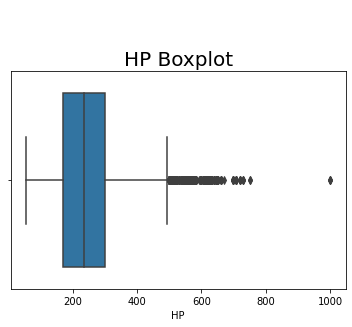

Cylinders Boxplot: 


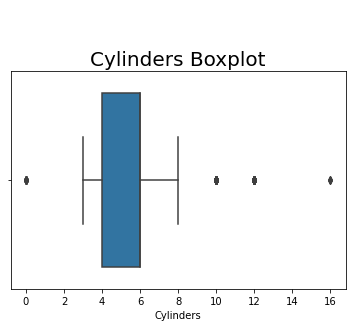

MPG-H Boxplot: 


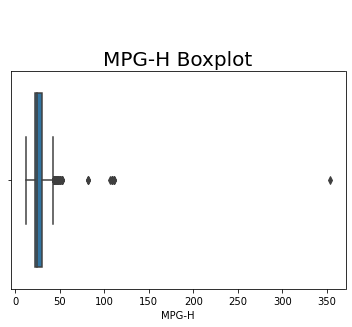

MPG-C Boxplot: 


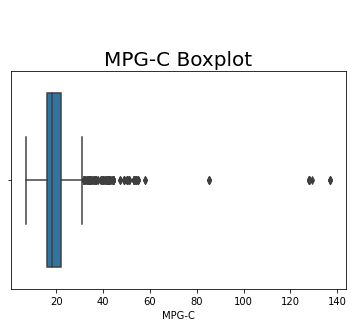

Popularity Boxplot: 


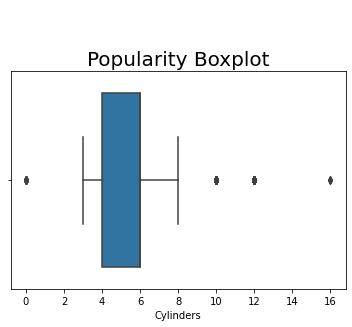

Price Boxplot: 


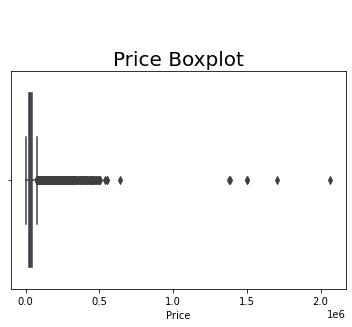

Year Boxplot: 


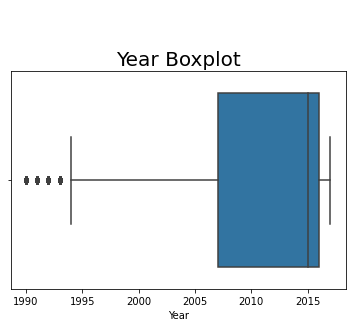

Number of rows BEFORE removing outliers: 11024

Number of rows AFTER removing outliers: 10528


In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Visualizing outliers using boxplot
# Plotting boxplots for all columns that we can plot

print("HP Boxplot: ")
plt.title("\n\nHP Boxplot", fontsize = 20)
sns.boxplot(x = 'HP', data = dataset)
plt.show()

print("Cylinders Boxplot: ")
plt.title("\n\nCylinders Boxplot", fontsize = 20)
sns.boxplot(x = "Cylinders", data = dataset)
plt.show()

print("MPG-H Boxplot: ")
plt.title("\n\nMPG-H Boxplot", fontsize = 20)
sns.boxplot(x = "MPG-H", data = dataset)
plt.show()

print("MPG-C Boxplot: ")
plt.title("\n\nMPG-C Boxplot", fontsize = 20)
sns.boxplot(x = "MPG-C", data = dataset)
plt.show()

print("Popularity Boxplot: ")
plt.title("\n\nPopularity Boxplot", fontsize = 20)
sns.boxplot(x = "Cylinders", data = dataset)
plt.show()

print("Price Boxplot: ")
plt.title("\n\nPrice Boxplot", fontsize = 20)
sns.boxplot(x = "Price", data = dataset)
plt.show()

print("Year Boxplot: ")
plt.title("\n\nYear Boxplot", fontsize = 20)
sns.boxplot(x = "Year", data = dataset)
plt.show()

# Removing outliers using Z-score
print(f"Number of rows BEFORE removing outliers: {dataset.shape[0]}\n")

z_score = np.abs(stats.zscore(dataset[['HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Popularity', 'Price', 'Year']]))

# Removing any data point with z-score > 3 by only including points having z-score < 3
dataset = dataset[(z_score < 3).all(axis = 1)]

print(f"Number of rows AFTER removing outliers: {dataset.shape[0]}")

## **6. Car brands that are most represented in the dataset and finding average price among the top 20 brands**

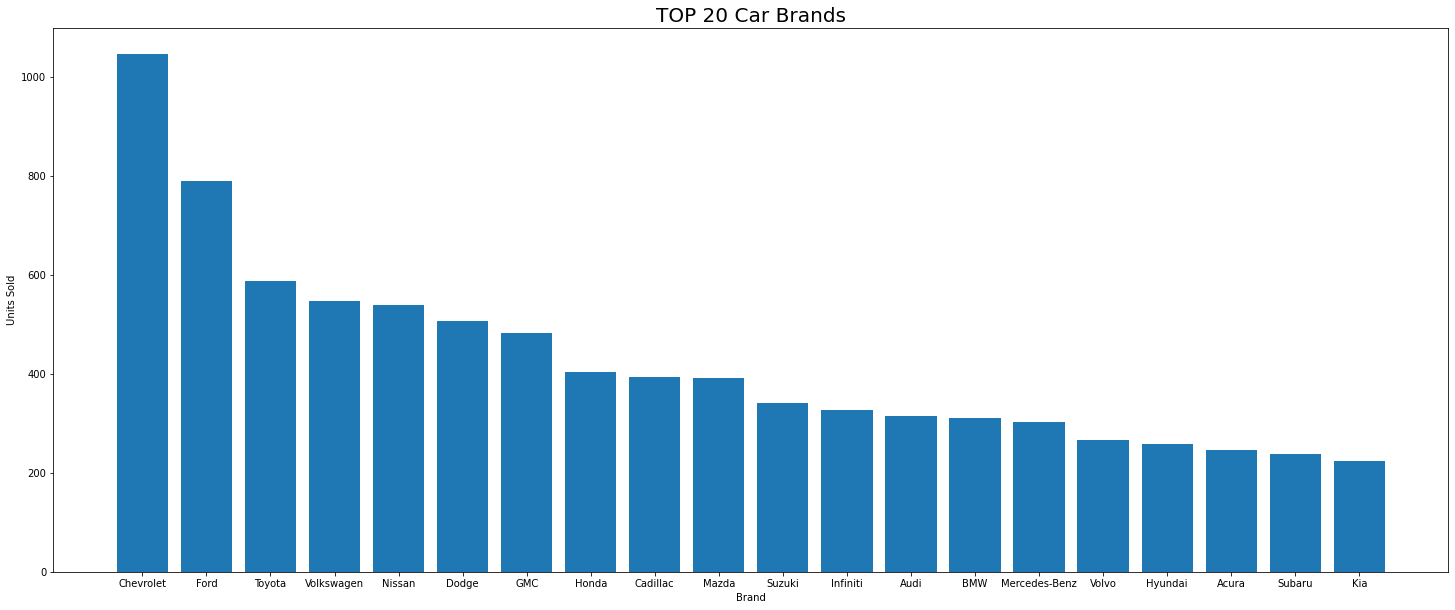



Average prices cars of top 20 brands: 


                      Price
Make                       
Acura          35087.487805
Audi           53506.623418
BMW            62237.323718
Chevrolet      27984.028653
Dodge          22183.928994
Ford           28390.422250
GMC            32444.085062
Honda          26614.503704
Hyundai        24922.100775
Infiniti       42640.271341
Kia            25318.750000
Mazda          20106.556122
Mercedes-Benz  56673.168874
Nissan         28406.948052
Subaru         24240.673640
Suzuki         18026.415205
Toyota         27583.076401
Volkswagen     28223.341241
Volvo          29724.684211


In [139]:
# Plotting a bar graph for representing top 20 car brands

count_of_cars = dataset['Make'].value_counts()

# Top 20 car brands
top_20 = count_of_cars.index[:20]

plt.figure(figsize = (25,10))
plt.title("TOP 20 Car Brands", fontsize = 20)
plt.xlabel("Brand")
plt.ylabel("Units Sold")
plt.bar(top_20, height = count_of_cars[:20])
plt.show()

# Average Pricing of cars from top 20 brands
avg_prices = dataset[['Make','Price']].loc[(dataset['Make'] == 'Chevrolet')|
               (dataset['Make'] == 'Ford')|
               (dataset['Make'] == 'Volkswagen')|
               (dataset['Make'] == 'Toyota')|
               (dataset['Make'] == 'Dodge')|
               (dataset['Make'] == 'Nissan')|
               (dataset['Make'] == 'GMC')|
               (dataset['Make'] == 'Honda')|
               (dataset['Make'] == 'Mazda')|
               (dataset['Make'] == 'Suzuki')|
               (dataset['Make'] == 'Infiniti')|
               (dataset['Make'] == 'Audi')|
               (dataset['Make'] == 'BMW')|
               (dataset['Make'] == 'Mercedes-Benz')|
               (dataset['Make'] == 'Volvo')|
               (dataset['Make'] == 'Hyundai')|
               (dataset['Make'] == 'Acura')|
               (dataset['Make'] == 'Subaru')|
               (dataset['Make'] == 'Kia')
               ].groupby('Make').mean()

print("\n\nAverage prices cars of top 20 brands: \n\n")

print(avg_prices)

## **7. Plotting Correlation Matrix**
A Positive Correlation between any two attributes, say 'a' and 'b' means that, as 'a' increases, 'b' will also increase ans vice versa.
A Negative Correlation on the other hand, means that as 'a' increases, 'b' decreases and vice versa.

A Heatmap can clearly show the correlations between various attributes.

Correlation Matrix Represented in the form of a Heatmap


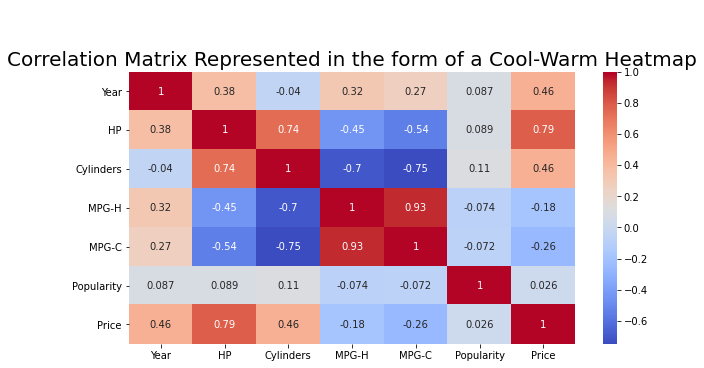



Attributes with high correlation: 
Correlation Between HP and Cylinders: 0.74
Correlation Between HP and Price: 0.79
Correlation Between MPG-H and MPG-C: 0.93


SCATTER PLOT between HP and Cylinders: 


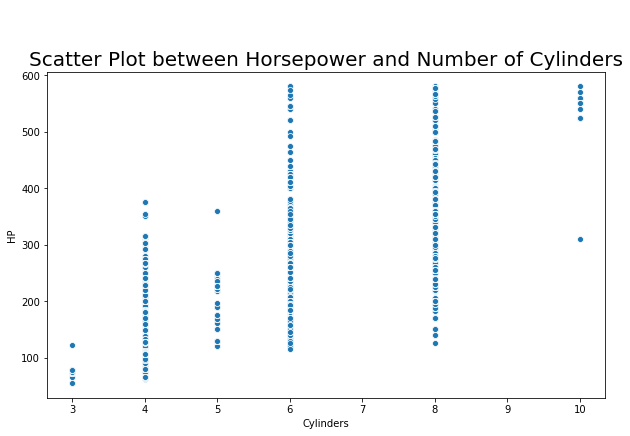



SCATTER PLOT between HP and Price: 


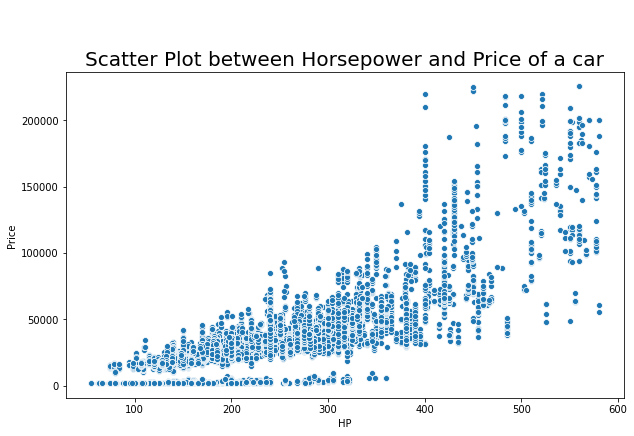



SCATTER PLOT between MPG-H and MPG-C: 


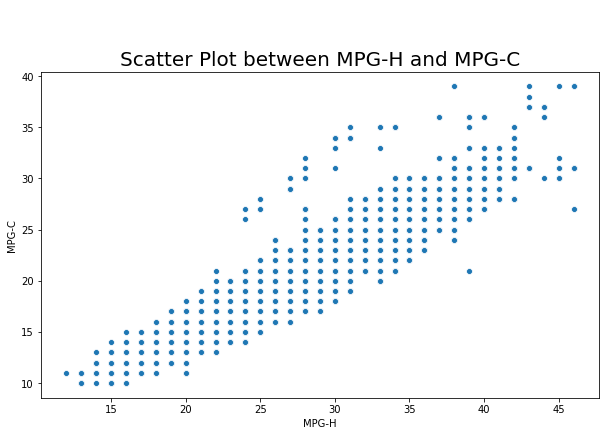



From the graphs, we can clearly see that the following pairs of attributes are positively correlated: 
1. HP and Cylinders.
2. HP and Price.
3. MPG-H and MPG-C 


In [143]:
# Plotting Heatmap to show correlation between all attributes
print("Correlation Matrix Represented in the form of a Heatmap")
correlation = dataset.corr()
plt.figure(figsize = (10, 5))
plt.title("\n\nCorrelation Matrix Represented in the form of a Cool-Warm Heatmap", fontsize = 20)
sns.heatmap(correlation, cmap = "coolwarm", annot = True)
plt.show()

# Scatter Plots between attributes that have a high positive correlation
# according to the Heatmap
print("\n\nAttributes with high correlation: ")
print("Correlation Between HP and Cylinders: 0.74")
print("Correlation Between HP and Price: 0.79")
print("Correlation Between MPG-H and MPG-C: 0.93")

print("\n\nSCATTER PLOT between HP and Cylinders: ")
plt.figure(figsize = (10, 6))
plt.title("\n\nScatter Plot between Horsepower and Number of Cylinders", fontsize = 20)
sns.scatterplot(x = "Cylinders", y = "HP", data = dataset)
plt.show()

print("\n\nSCATTER PLOT between HP and Price: ")
plt.figure(figsize = (10, 6))
plt.title("\n\nScatter Plot between Horsepower and Price of a car", fontsize = 20)
sns.scatterplot(x = "HP", y = "Price", data = dataset)
plt.show()

print("\n\nSCATTER PLOT between MPG-H and MPG-C: ")
plt.figure(figsize = (10, 6))
plt.title("\n\nScatter Plot between MPG-H and MPG-C", fontsize = 20)
sns.scatterplot(x = "MPG-H", y = "MPG-C", data = dataset)
plt.show()

print("\n\nFrom the graphs, we can clearly see that the following pairs of attributes are positively correlated: ")
print("1. HP and Cylinders.\n2. HP and Price.\n3. MPG-H and MPG-C ")

## **8. Exploratory Data Analysis (EDA)**
Plotting different graphs to see relationship between various attributes.

### What are the prices of cars by different car makers?

Bar Plot between Price and Make: 




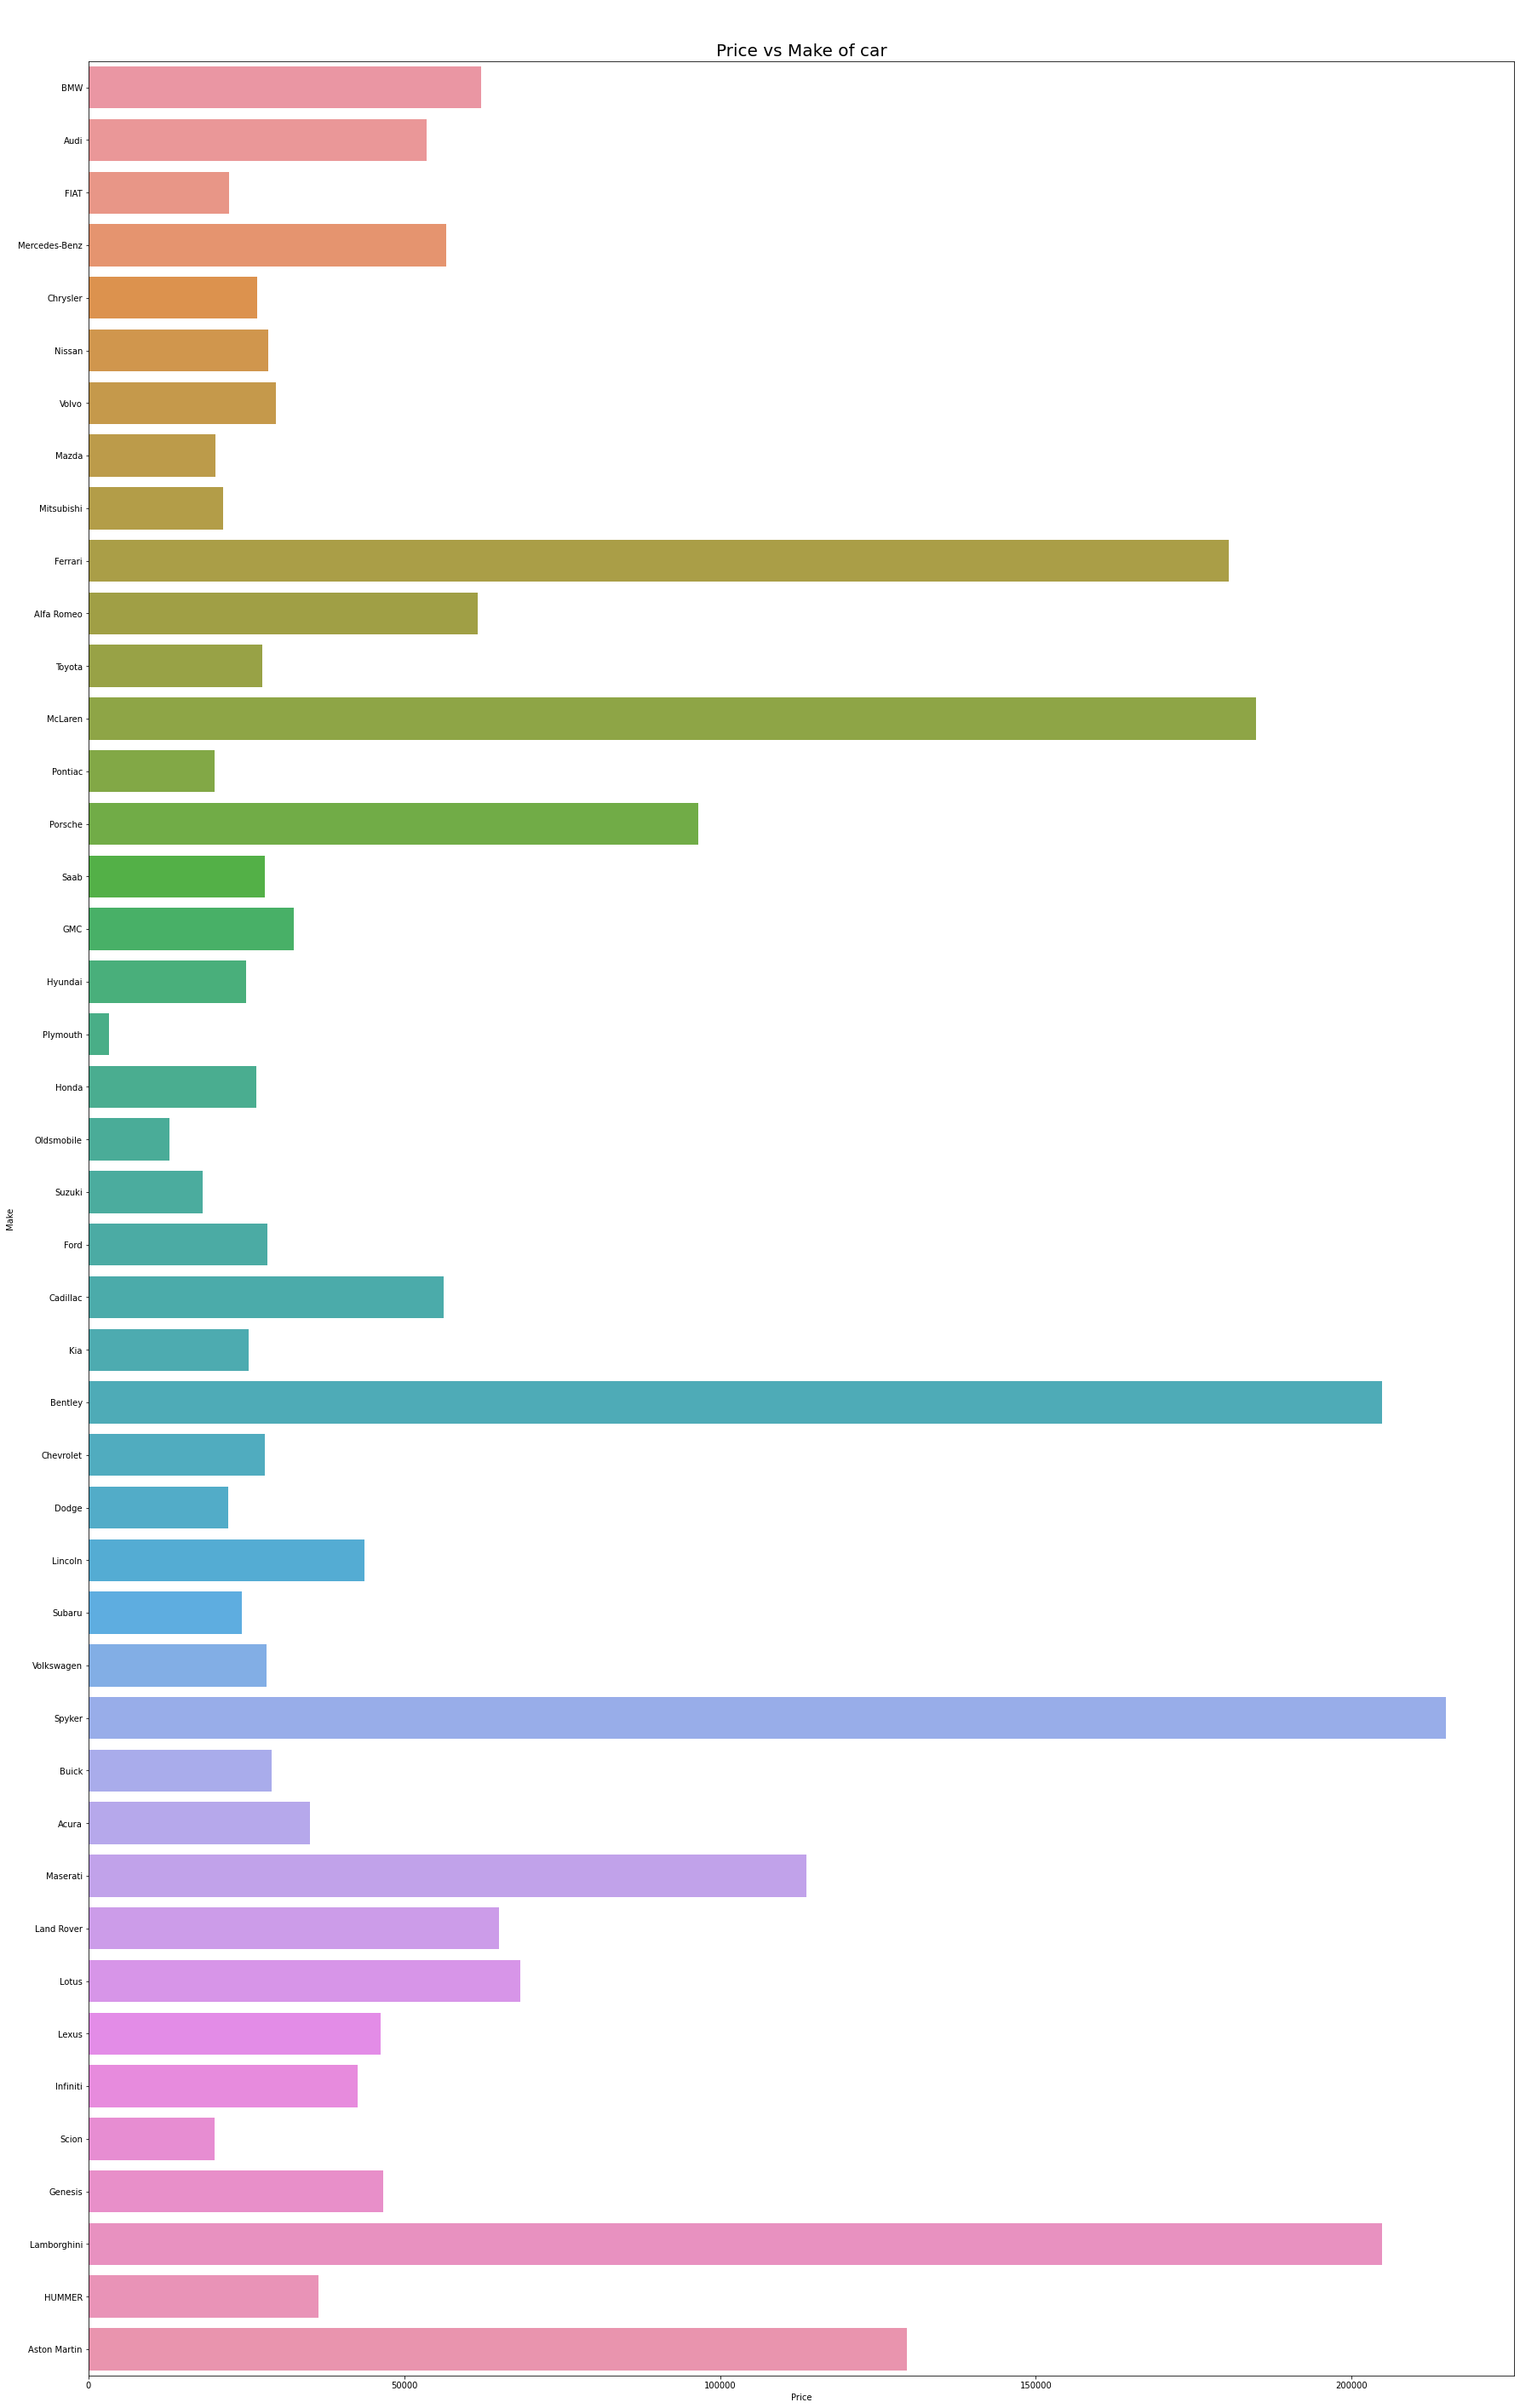




This Graph shows the prices of cars from different brands. It is clear that the prices of cars made by premium brands like Ferrari, McLaren, Bentley, Spyker, Lamborghini and Aston Martin are much higher that economical brands like FIAT, Mitsubishi, Volvo, Toyota, etc.
The most expensive brand in Lamborghini.


In [146]:
# Plotting a bar plot between Price and Make to see the prices of different brands of cars

print("Bar Plot between Price and Make: \n\n")
plt.figure(figsize = (30, 50))
plt.title("\n\nPrice vs Make of car", fontsize = 20)
sns.barplot(x = "Price", y = "Make", data = dataset, ci = None)
plt.show()
print("\n\n\nThis Graph shows the prices of cars from different brands. It is clear that the prices of cars made by premium brands like Ferrari, McLaren, Bentley, Spyker, Lamborghini and Aston Martin are much higher that economical brands like FIAT, Mitsubishi, Volvo, Toyota, etc.\nThe most expensive brand in Lamborghini.")

### What type of cars sold the most?

Bar Plot Bar Plot between Vehicle Style and it's count: 


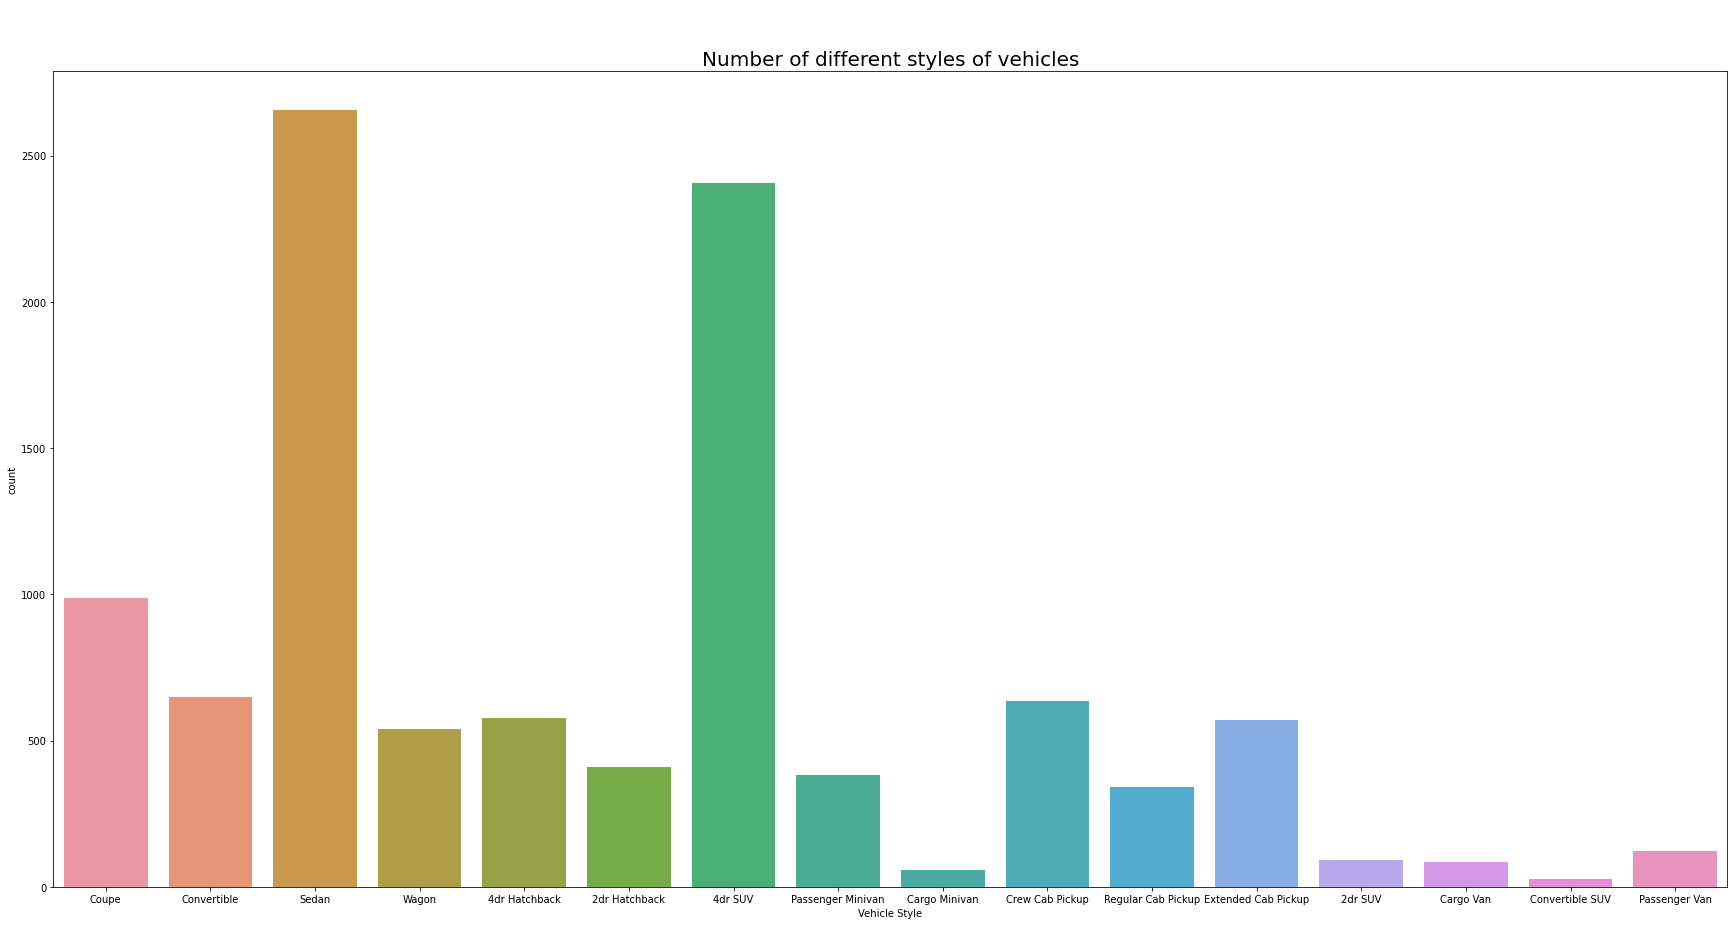

From the graph, it is clear that the 4dr SUV type of car is the most popular type.


In [147]:
# Bar Plot between Vehicle Style and it's count
print("Bar Plot Bar Plot between Vehicle Style and it's count: ")
plt.figure(figsize = (30, 15))
plt.title("\n\nNumber of different styles of vehicles", fontsize = 20)
sns.countplot(x = 'Vehicle Style', data = dataset)
plt.show()
print("From the graph, it is clear that the 4dr SUV type of car is the most popular type.")

### Trend in HP with number of cylinders

Barplot between number of cylinders and Horsepower


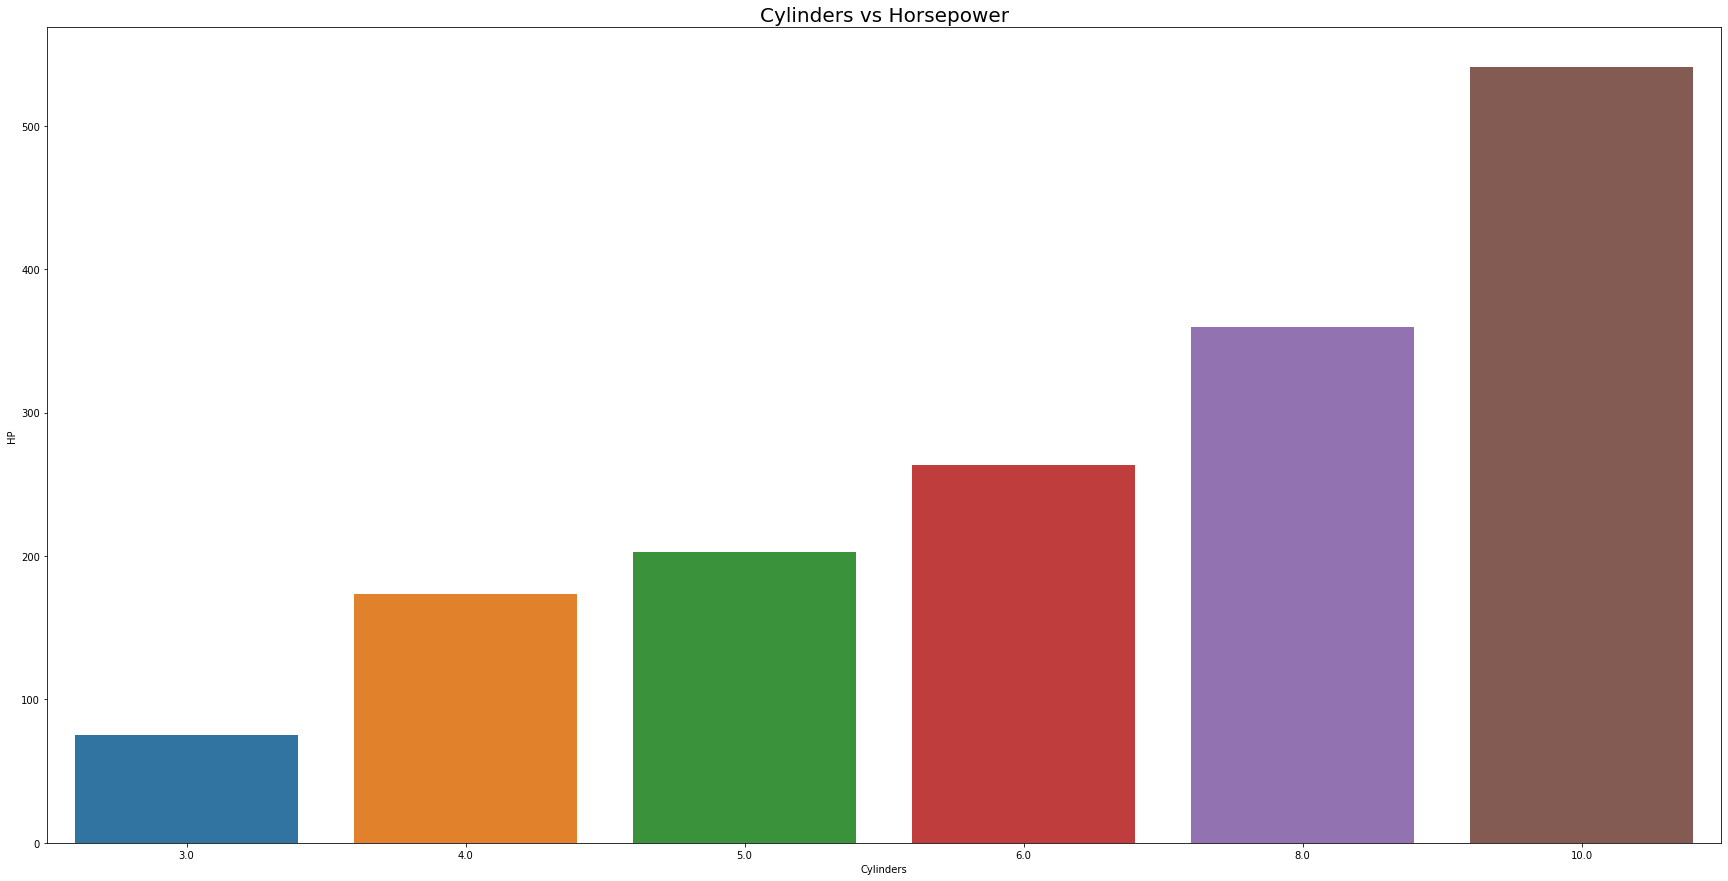

The graph shows a clear trend that as the number of cylinders increase, the Horsepower also increases.


In [148]:
print("Barplot between number of cylinders and Horsepower")
plt.figure(figsize = (30, 15))
sns.barplot(x = 'Cylinders', y = 'HP', data = dataset, ci = False)
plt.title("Cylinders vs Horsepower", fontsize = 20)
plt.show()
print("The graph shows a clear trend that as the number of cylinders increase, the Horsepower also increases.")

### Price of cars according to number of cylinders

Bar Plot between number of cylinders and price of the cars


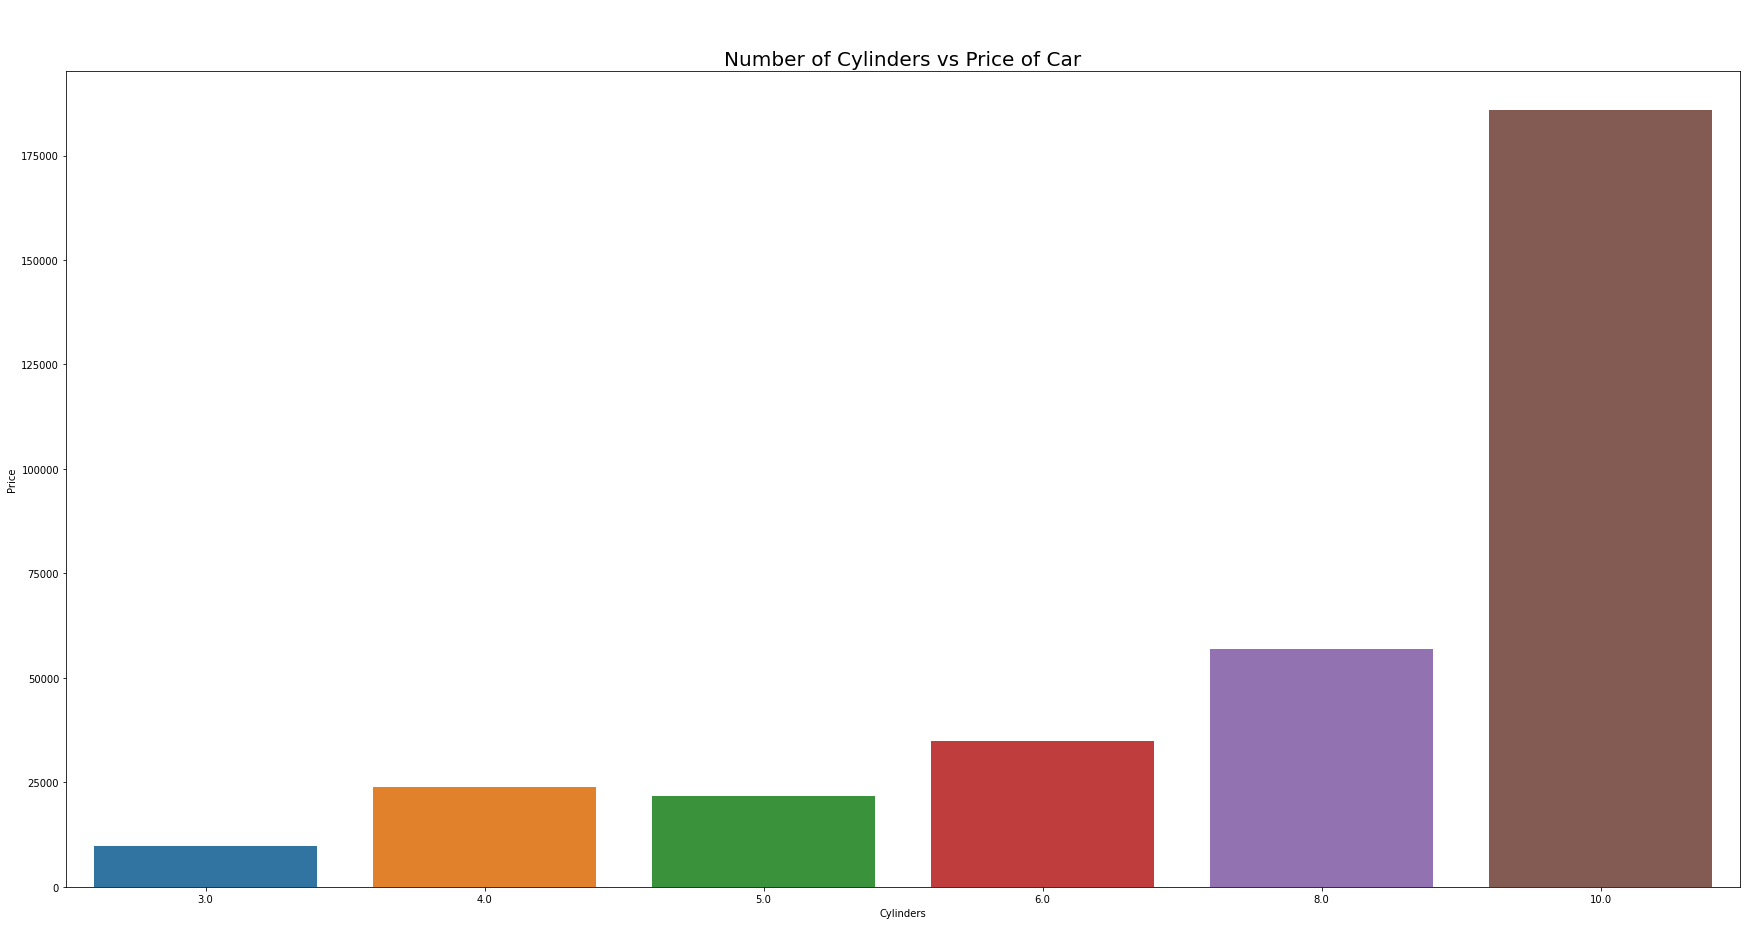

It is clear from the graph that as the number of cylinders increase, the price of the cars also increase.
From the graph above this one, we concluded that the Horsepower increases with Number of Cylinders.
So it is safe to say that the price increases with increase in Horsepower. 


In [149]:
print("Bar Plot between number of cylinders and price of the cars")
plt.figure(figsize = (30, 15))
plt.title("\n\nNumber of Cylinders vs Price of Car", fontsize = 20)
sns.barplot(x = 'Cylinders', y = 'Price', data = dataset, ci = False)
plt.show()
print("It is clear from the graph that as the number of cylinders increase, the price of the cars also increase.\nFrom the graph above this one, we concluded that the Horsepower increases with Number of Cylinders.\nSo it is safe to say that the price increases with increase in Horsepower. ")

### Number of Vehicles of each type

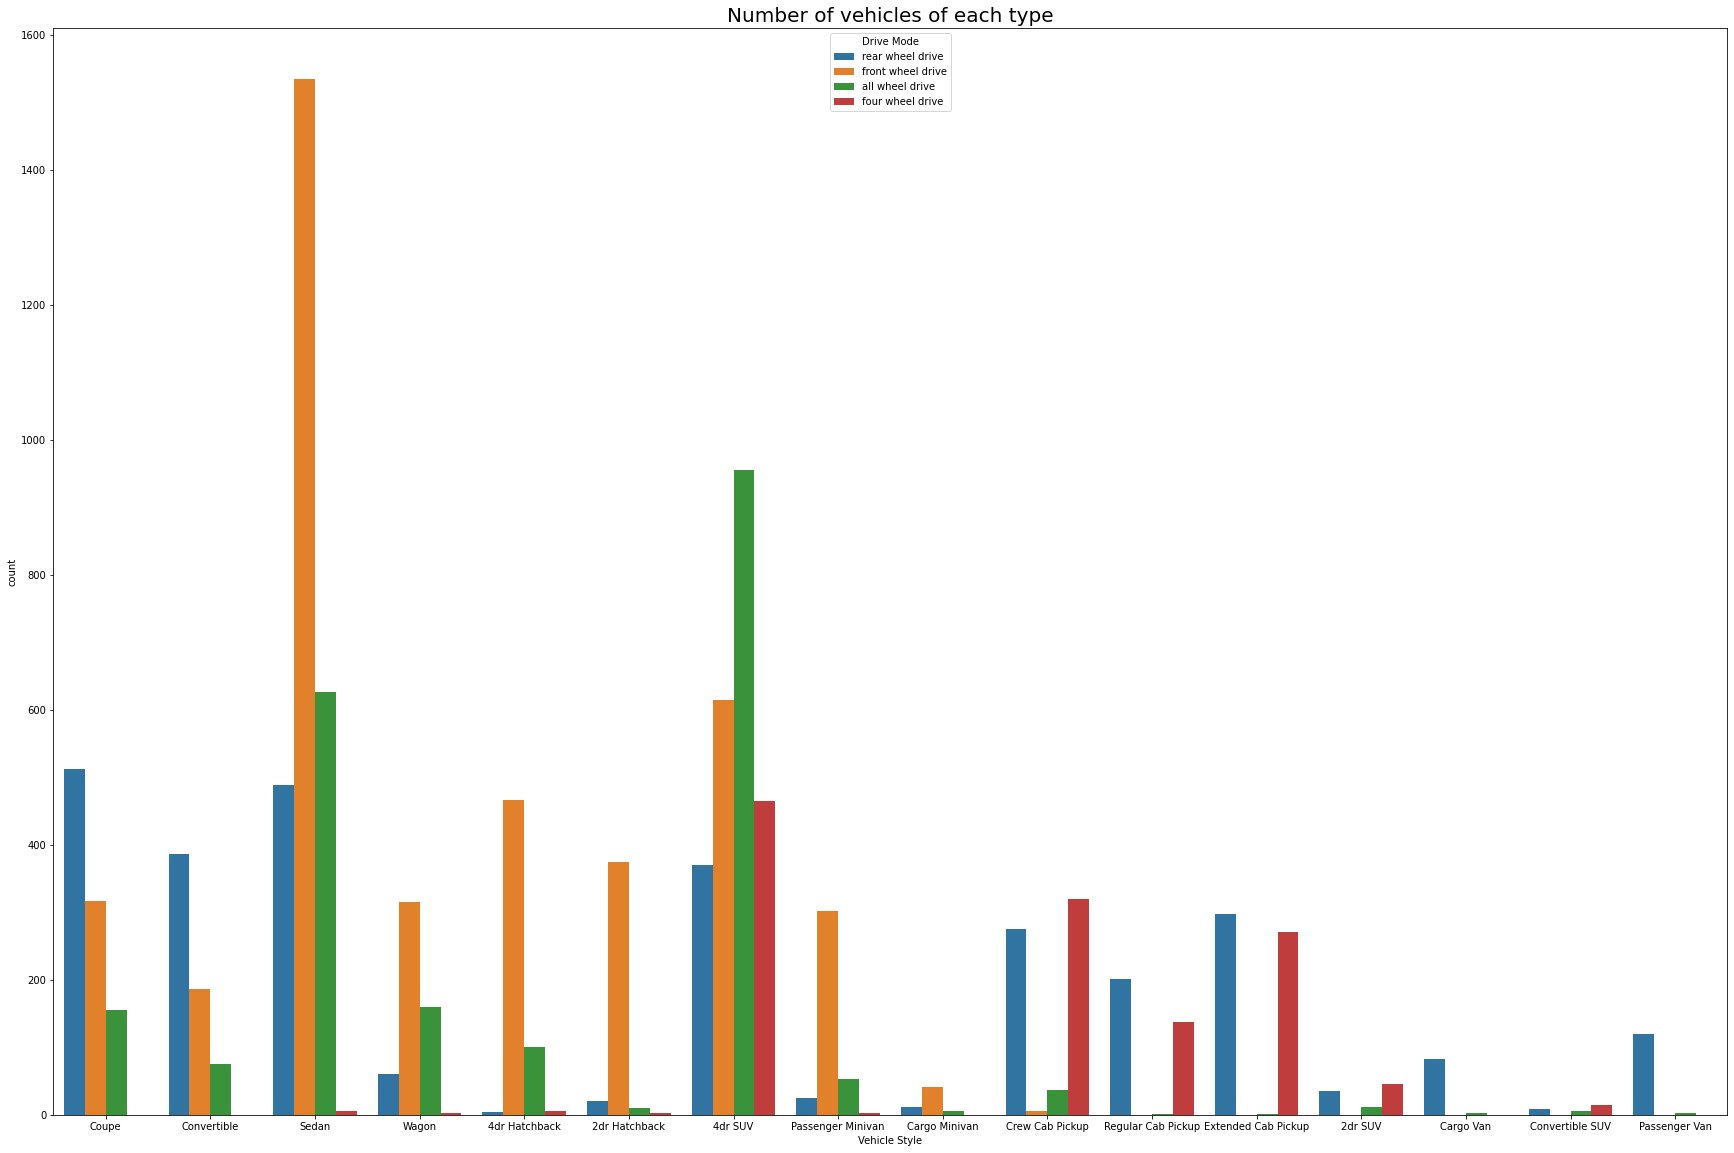

From the graph, we can see that the most common vehicle type is a 4dr SUV with 'all wheel drive'


In [150]:
plt.figure(figsize = (30, 20))
sns.countplot(x = 'Vehicle Style', data = dataset, hue = 'Drive Mode')
plt.title("Number of vehicles of each type", fontsize = 20)
plt.show()
print("From the graph, we can see that the most common vehicle type is a 4dr SUV with 'all wheel drive'")

### Price Brackets of the various cars

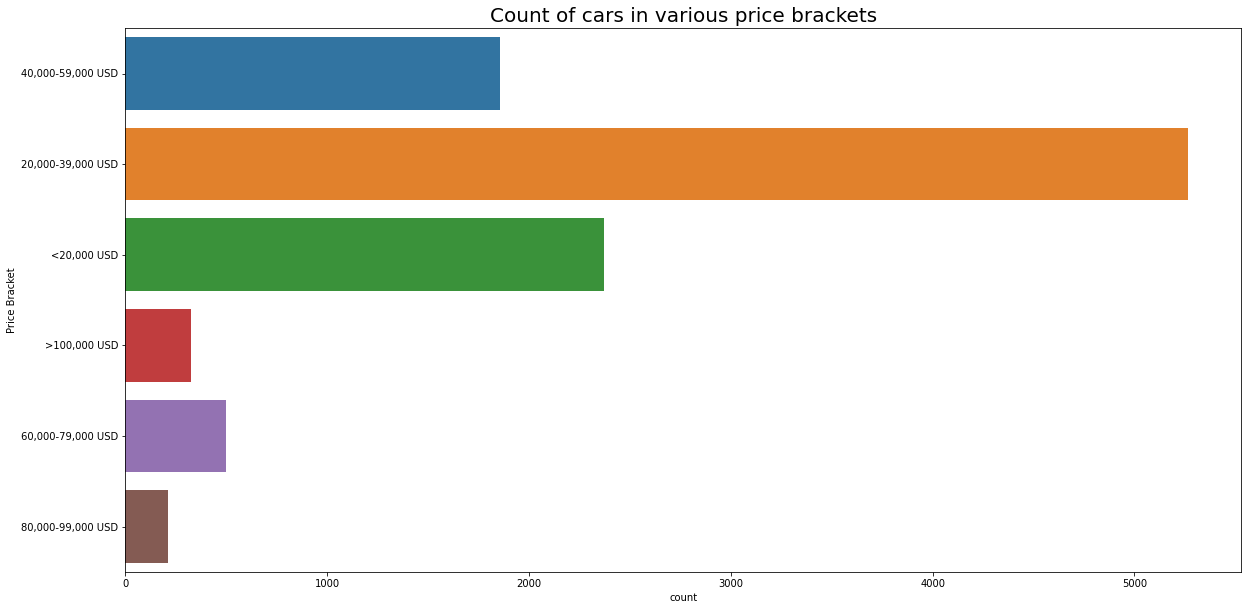

We can see that the number of cars in the economy 20-30k USD price segment is the highest.
The number of cars in the premium 80-99k USD is the lowest.


In [151]:
# Creating a new column called 'Price Bracket' to store the number of cars in various price brackets
dataset['Price Bracket'] = pd.cut(dataset['Price'],[0,20000,40000,60000,80000,100000,600000], labels = ['<20,000 USD','20,000-39,000 USD','40,000-59,000 USD','60,000-79,000 USD','80,000-99,000 USD','>100,000 USD'], include_lowest = True)
dataset['Price Bracket'] = dataset['Price Bracket'].astype(object)

# Plotting the countplot to show the number of cars in various price brackets
plt.figure(figsize = (20, 10))
plt.title("Count of cars in various price brackets", fontsize = 20)
sns.countplot(y = "Price Bracket", data = dataset)
plt.show()

print("We can see that the number of cars in the economy 20-30k USD price segment is the highest.\nThe number of cars in the premium 80-99k USD is the lowest.")

## **9. Creating a Base Machine Learning Regression Model to predict the prices of cars.**

Mean Absolute Error of Linear Regression Model: 0.3645535511733377
Root Mean Squared Error of Linear Regression Model: 0.5592370985641156
R2 Score of Linear Regression Model: 0.6715100658291282


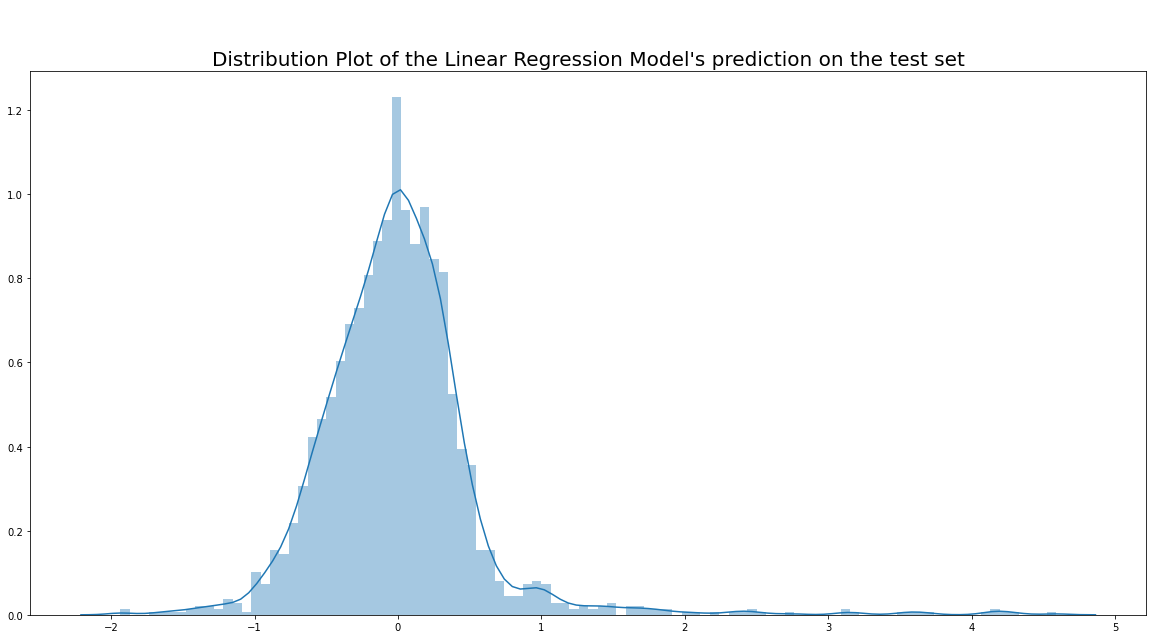

The graph shows that the fit is not proper.


In [152]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Seperating the features and labels to train and test the model
features = dataset[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
labels = dataset[['Price']].values

# Scaling the data (i.e., bringing the data to the same scale or normalizing the data)
features = StandardScaler().fit_transform(features)
labels = StandardScaler().fit_transform(labels)

# Splitting the features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 13)

# Training the Linear Regression Model
Model = LinearRegression().fit(X_train, y_train)

# Predicting the test set
Prediction_Test = Model.predict(X_test)

# Evaluation Metrics
print('Mean Absolute Error of Linear Regression Model:', mean_absolute_error(y_test, Prediction_Test))  
print('Root Mean Squared Error of Linear Regression Model:', np.sqrt(mean_squared_error(y_test, Prediction_Test)))
print('R2 Score of Linear Regression Model:', r2_score(y_test, Prediction_Test))

# Plotting the Distribution Plot of the model's prediction
plt.figure(figsize = (20,10))
plt.title("\n\nDistribution Plot of the Linear Regression Model's prediction on the test set", fontsize = 20)
sns.distplot((y_test - Prediction_Test), bins = 100)
plt.show()

print("The graph shows that the fit is not proper.")

## **10. Trying different Regression algorithms to try and improve the performance of regular Linear Regression**

### Lasso Regression

Mean Absolute Error of Lasso Regression Model: 0.3565510959494724
Root Mean Squared Error of Lasso Regression Model: 0.5886706582399562
R2 Score of Lasso Regression Model: 0.6360221987673498


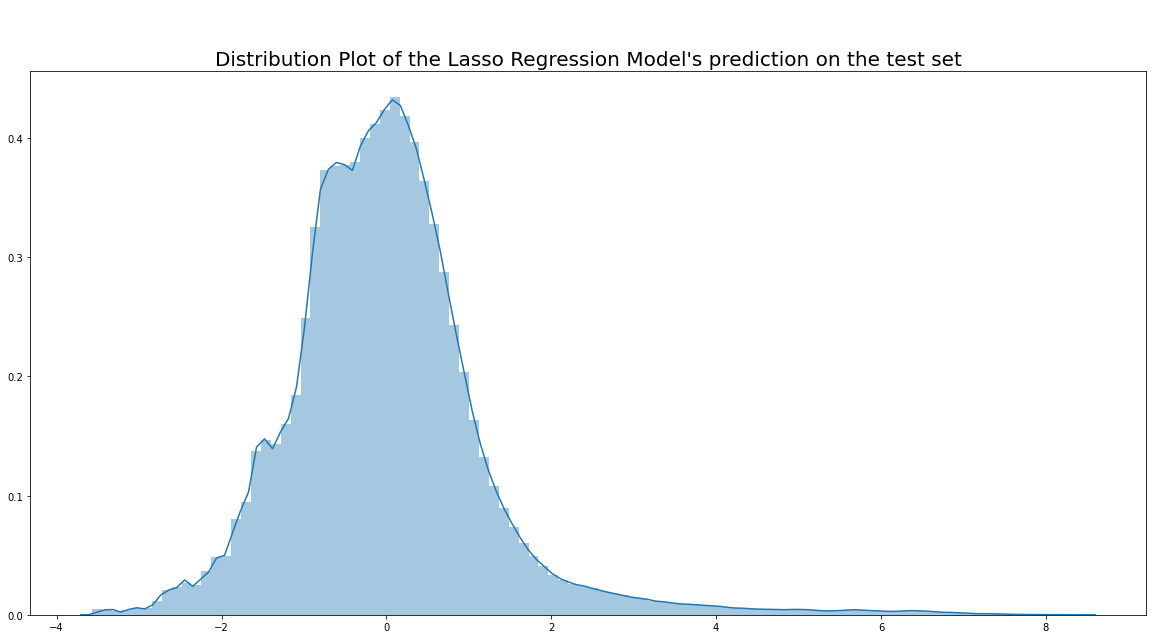

The r2 score is too low.


In [153]:
# Importing Lasso Regressor
from sklearn.linear_model import Lasso

# Training the model with value of alpha = 0.1
Model = Lasso(alpha = 0.1).fit(X_train, y_train)

# Predicting the test set
Prediction_Test = Model.predict(X_test)

# Evaluation Metrics
print('Mean Absolute Error of Lasso Regression Model:', mean_absolute_error(y_test, Prediction_Test))  
print('Root Mean Squared Error of Lasso Regression Model:', np.sqrt(mean_squared_error(y_test, Prediction_Test)))
print('R2 Score of Lasso Regression Model:', r2_score(y_test, Prediction_Test))

# Plotting the Distribution Plot of the model's prediction
plt.figure(figsize = (20,10))
plt.title("\n\nDistribution Plot of the Lasso Regression Model's prediction on the test set", fontsize = 20)
sns.distplot((y_test - Prediction_Test), bins = 100)
plt.show()

print("The r2 score is too low.")

### ElasticNet regression

Mean Absolute Error of ElasticNet Regression Model: 0.34921116729271307
Root Mean Squared Error of ElasticNet Regression Model: 0.5890911979038408
R2 Score of ElasticNet Regression Model: 0.6355019697572837


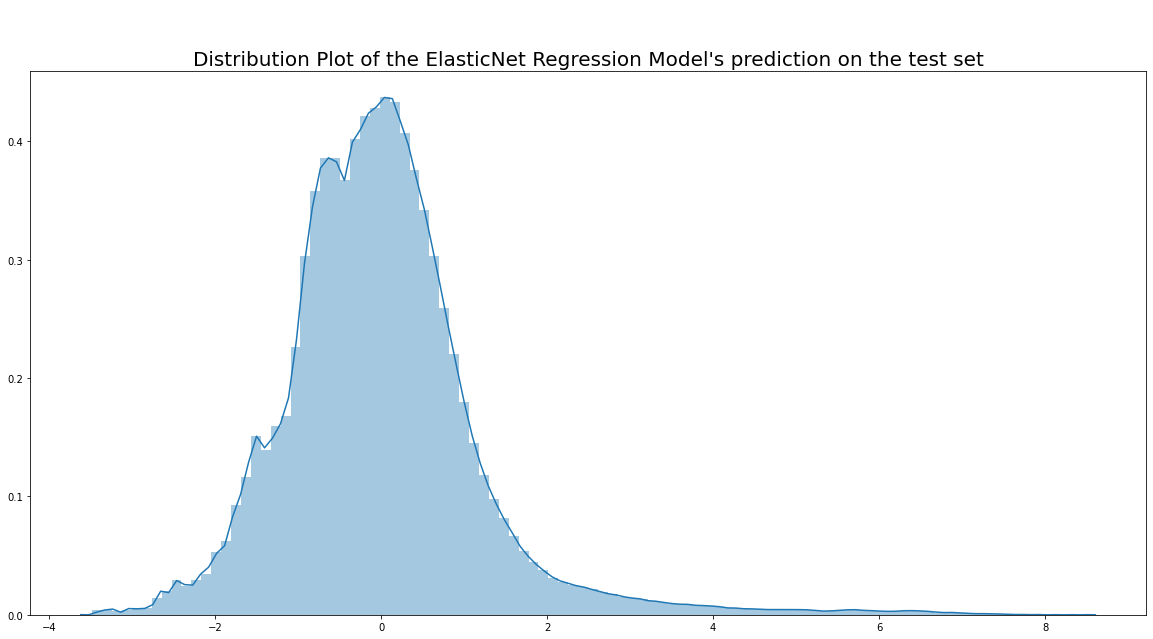

This is very similar to the Lasso Regresion model and not good enough.


In [154]:
# Importing the ElasticNet Regressor
from sklearn.linear_model import ElasticNet

# Training the model with value of alpha = 0.15
Model = ElasticNet(alpha = 0.15).fit(X_train, y_train)

# Predicting the test set
Prediction_Test = Model.predict(X_test)

# Evaluation Metrics
print('Mean Absolute Error of ElasticNet Regression Model:', mean_absolute_error(y_test, Prediction_Test))  
print('Root Mean Squared Error of ElasticNet Regression Model:', np.sqrt(mean_squared_error(y_test, Prediction_Test)))
print('R2 Score of ElasticNet Regression Model:', r2_score(y_test, Prediction_Test))

# Plotting the Distribution Plot of the model's prediction
plt.figure(figsize = (20,10))
plt.title("\n\nDistribution Plot of the ElasticNet Regression Model's prediction on the test set", fontsize = 20)
sns.distplot((y_test - Prediction_Test), bins = 100)
plt.show()

print("This is very similar to the Lasso Regresion model and not good enough.")

### Support Vector Regressor (SVR)

Mean Absolute Error of SVR Regression Model: 0.23037213324968775
Root Mean Squared Error of SVR Regression Model: 0.39107111570120034
R2 Score of SVR Regression Model: 0.83936447418407


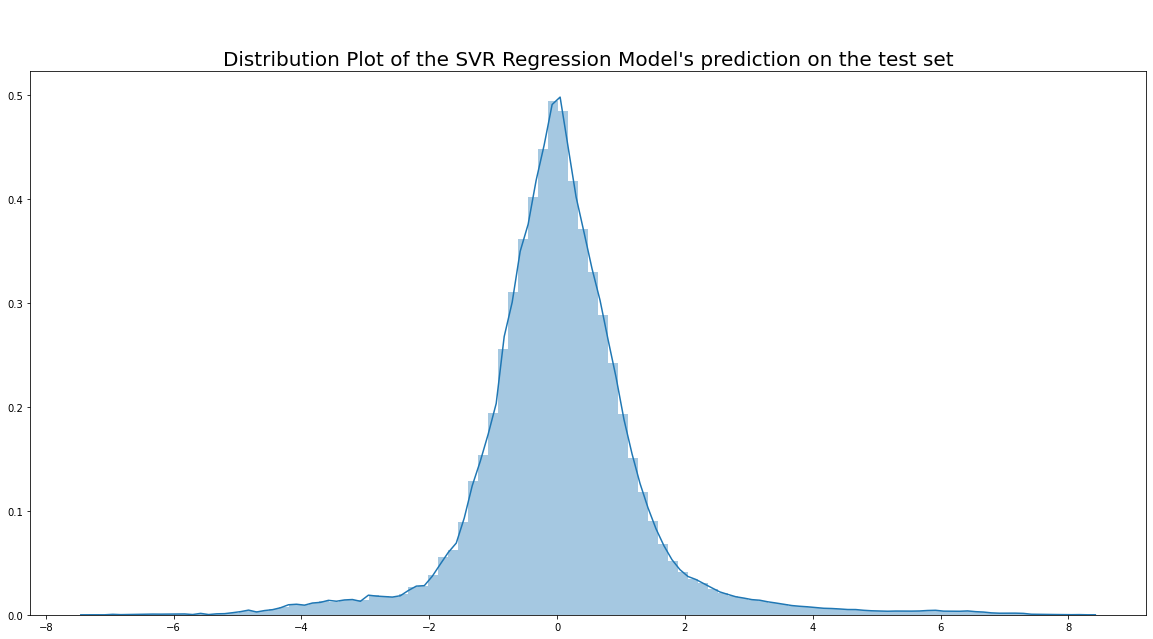

This is quite good but we can do even better.


In [155]:
# Importing the SVR Regressor
from sklearn.svm import SVR

# Training the model with the RBF kernel
Model = SVR(kernel = 'rbf').fit(X_train, y_train)

# Predicting the test set
Prediction_Test = Model.predict(X_test)

# Evaluation Metrics
print('Mean Absolute Error of SVR Regression Model:', mean_absolute_error(y_test, Prediction_Test))  
print('Root Mean Squared Error of SVR Regression Model:', np.sqrt(mean_squared_error(y_test, Prediction_Test)))
print('R2 Score of SVR Regression Model:', r2_score(y_test, Prediction_Test))

# Plotting the Distribution Plot of the model's prediction
plt.figure(figsize = (20,10))
plt.title("\n\nDistribution Plot of the SVR Regression Model's prediction on the test set", fontsize = 20)
sns.distplot((y_test - Prediction_Test), bins = 100)
plt.show()

print("This is quite good but we can do even better.")

### Random Forest Regressor
Decision Trees are prone to overfitting. So we are directly using Random Forests.

Mean Absolute Error of Random Forest Regression Model: 0.12373578149881141
Root Mean Squared Error of Random Forest Regression Model: 0.2144678552527018
R2 Score of Random Forest Regression Model: 0.9516880534741197


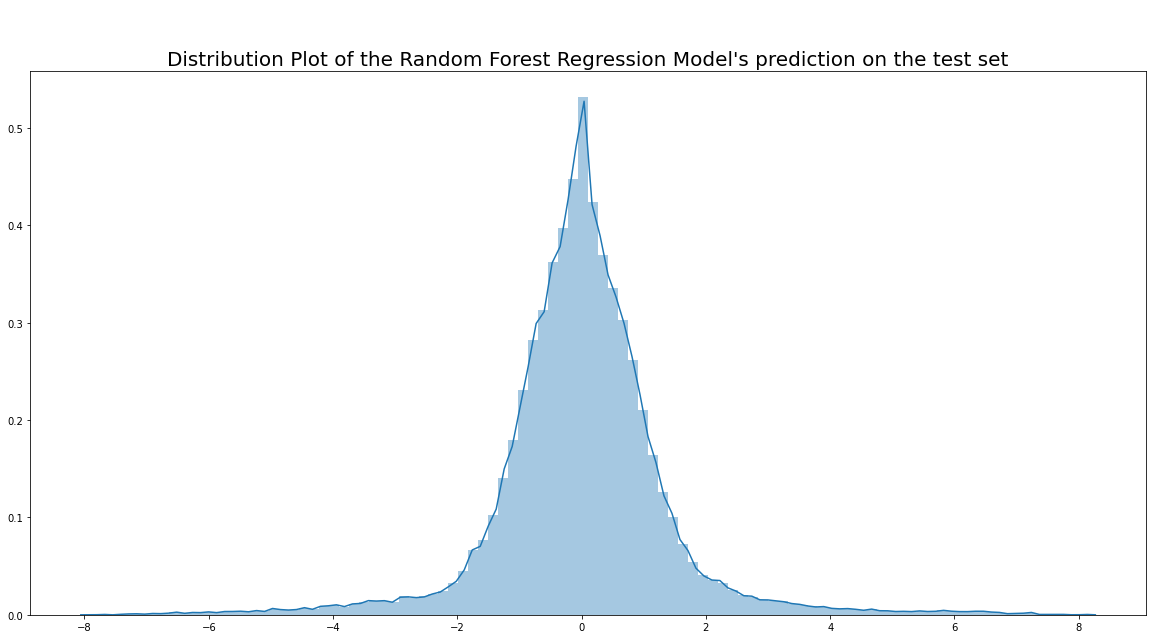

The prediction of the test set is excellent and can be accepted.


In [156]:
# Importing the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Training the model 50 trees in the random forest
Model = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

# Predicting the test set
Prediction_Test = Model.predict(X_test)

# Evaluation Metrics
print('Mean Absolute Error of Random Forest Regression Model:', mean_absolute_error(y_test, Prediction_Test))  
print('Root Mean Squared Error of Random Forest Regression Model:', np.sqrt(mean_squared_error(y_test, Prediction_Test)))
print('R2 Score of Random Forest Regression Model:', r2_score(y_test, Prediction_Test))

# Plotting the Distribution Plot of the model's prediction
plt.figure(figsize = (20,10))
plt.title("\n\nDistribution Plot of the Random Forest Regression Model's prediction on the test set", fontsize = 20)
sns.distplot((y_test - Prediction_Test), bins = 100)
plt.show()

print("The prediction of the test set is excellent and can be accepted.")
